In [87]:
import zipfile
from pathlib import Path

In [88]:
home = str(Path.home())
DATA_DIR = home + '/.kaggle/competitions/quora-question-pairs/'
fileList = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for file in fileList:
    zipRef = zipfile.ZipFile(DATA_DIR + file, 'r')
    zipRef.extractall(DATA_DIR)
    zipRef.close()

In [89]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [90]:
home = str(Path.home())
DATA_PATH = home + '/.kaggle/competitions/quora-question-pairs/'

In [91]:
print("파일 크기 : ")
for file in os.listdir(DATA_PATH):
    if 'csv' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
train.csv                     63.4MB
sample_submission.csv         22.35MB
test.csv                      477.59MB
train.csv.zip                 22.53MB
test.csv.zip                  181.83MB
sample_submission.csv.zip     5.19MB


In [92]:
trainDf = pd.read_csv(DATA_PATH + 'train.csv')
trainDf.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [93]:
print('전체 학습데이터의 개수: {}'.format(len(trainDf)))

전체 학습데이터의 개수: 404290


In [94]:
trainSet = pd.Series(trainDf['question1'].tolist() + trainDf['question2'].tolist()).astype(str)
trainSet.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [95]:
print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(trainSet))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(trainSet.value_counts() > 1)))

교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


Text(0, 0.5, 'Number of questions')

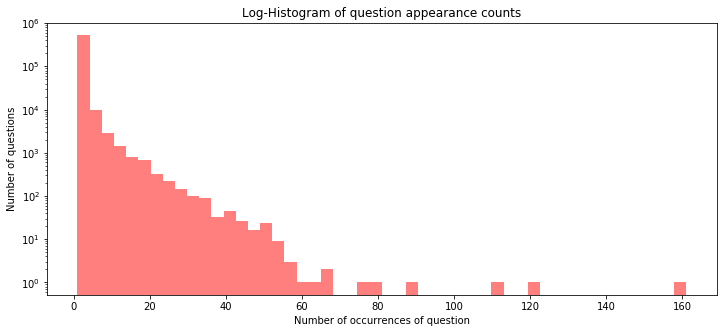

In [96]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(trainSet.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of question appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of question')
# 그래프 y 축 라벨
plt.ylabel('Number of questions')

In [97]:
print('중복 최대 개수: {}'.format(np.max(trainSet.value_counts())))
print('중복 최소 개수: {}'.format(np.min(trainSet.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(trainSet.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(trainSet.value_counts())))
print('중복 중간길이: {}'.format(np.median(trainSet.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(trainSet.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(trainSet.value_counts(), 75)))


중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f006b527e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f006b4dc518>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f006b527d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f006b4dcba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f006b4e3240>],
 'means': [<matplotlib.lines.Line2D at 0x7f006b4dcef0>]}

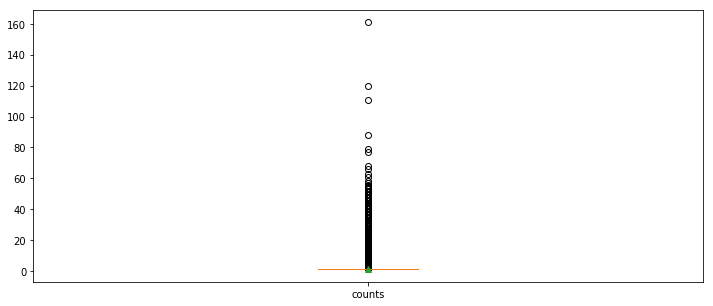

In [98]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([trainSet.value_counts()],
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

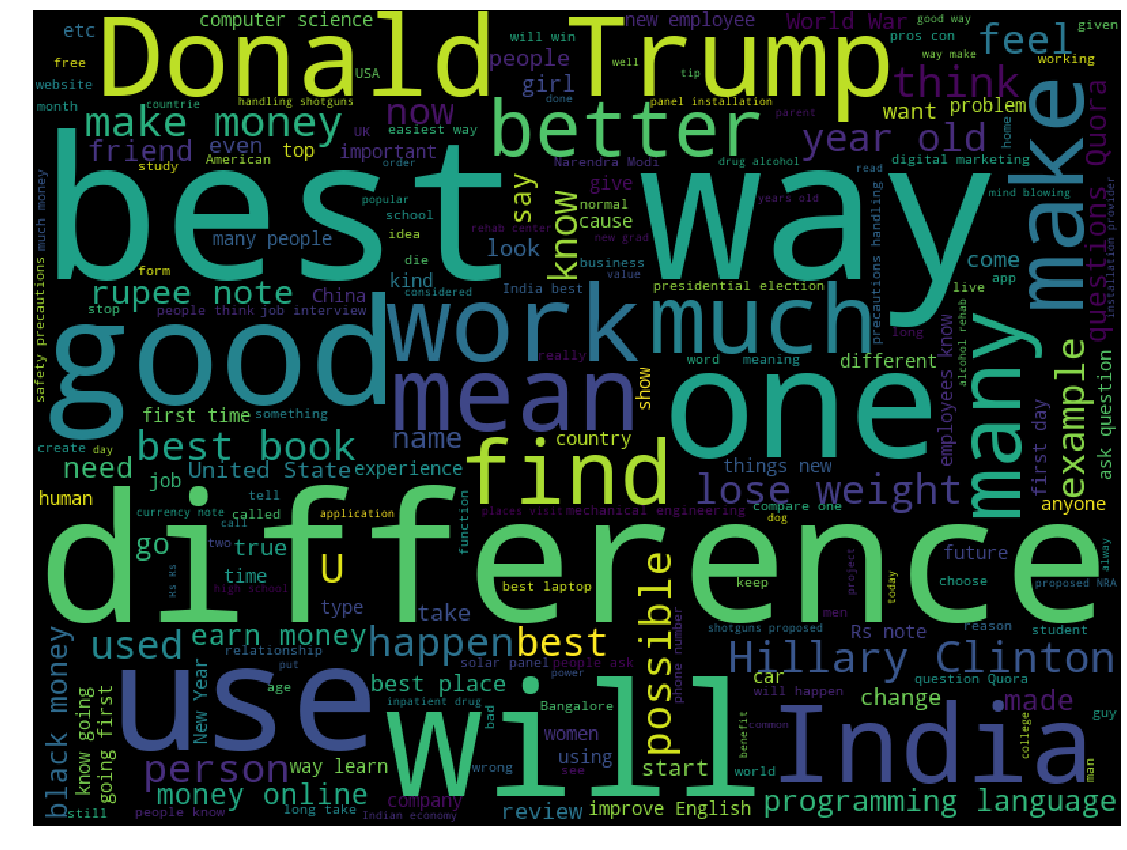

In [99]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(trainSet.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

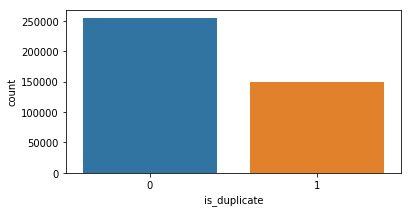

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = trainDf['is_duplicate'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(trainDf['is_duplicate'])

In [116]:
trainDist = trainSet.apply(len)

/home/evo_mind/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Probability')

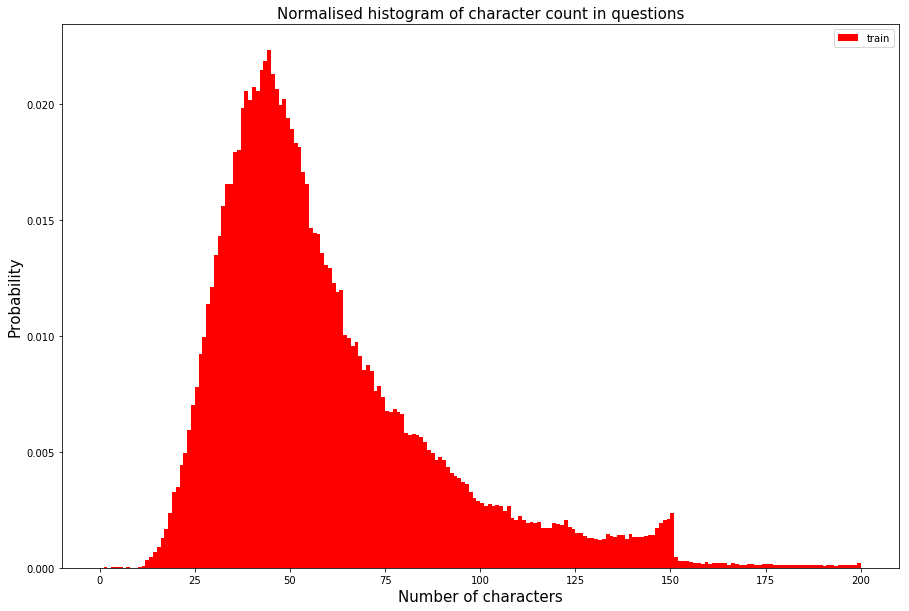

In [117]:
plt.figure(figsize=(15, 10))
plt.hist(trainDist, bins=200, range=[0,200], facecolor='r', normed=True, label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [118]:
print('훈련 평균 문자 수: {:.2f} 훈련 표준편차 문자 수: {:.2f} 훈련 가장 큰 문자 수: {:.2f} '.format(
    trainDist.mean(), trainDist.std(), trainDist.max()))

훈련 평균 문자 수: 59.82 훈련 표준편차 문자 수: 31.96 훈련 가장 큰 문자 수: 1169.00 


In [119]:
trainDist = trainSet.apply(lambda x:len(x.split(' ')))

/home/evo_mind/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Prabability')

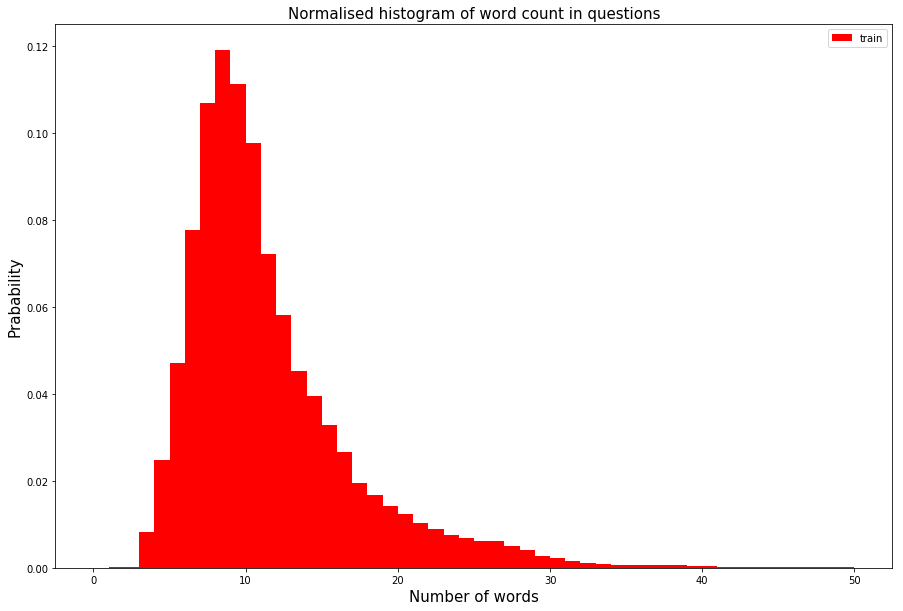

In [120]:
plt.figure(figsize=(15, 10))
plt.hist(trainDist, bins=50, range=[0, 50], facecolor='r', normed=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)


In [124]:
print('훈련 평균 단어: {:.2f} 훈련 표준편차 단어: {:.2f} 훈련 가장 큰 단어: {:.2f} '.format(
    trainDist.mean(), trainDist.std(), trainDist.max()))

훈련 평균 단어: 11.06 훈련 표준편차 단어: 5.89 훈련 가장 큰 단어: 237.00 


In [125]:
qmarks = np.mean(trainSet.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(trainSet.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(trainSet.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(trainSet.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(trainSet.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(trainSet.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('질문이 가득 찼을 때: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
질문이 가득 찼을 때: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%
